In [3]:
import pickle
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# 데이터 로드
with open("X_train.pkl", "rb") as f:
    X_train = pickle.load(f)
with open("y_train.pkl", "rb") as f:
    y_train = pickle.load(f)
with open("X_test.pkl", "rb") as f:
    X_test = pickle.load(f)
with open("y_test.pkl", "rb") as f:
    y_test = pickle.load(f)

# Lasso 회귀 모델 정의 및 하이퍼파라미터 튜닝
lasso = Lasso(max_iter=10000)
params = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(lasso, params, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

# 최적 모델 저장
best_lasso = grid.best_estimator_
with open("lasso_model.pkl", "wb") as f:
    pickle.dump(best_lasso, f)

# 예측 및 평가
y_pred = best_lasso.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Best alpha: {grid.best_params_['alpha']}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.2f}")

# 예측 결과 저장
pd.DataFrame({
    "actual": y_test,
    "predicted": y_pred
}).to_csv("predictions_lasso.csv", index=False)


Best alpha: 0.01
RMSE: 4.93
R^2: 0.67


<Axes: title={'center': 'Lasso Coefficients'}>

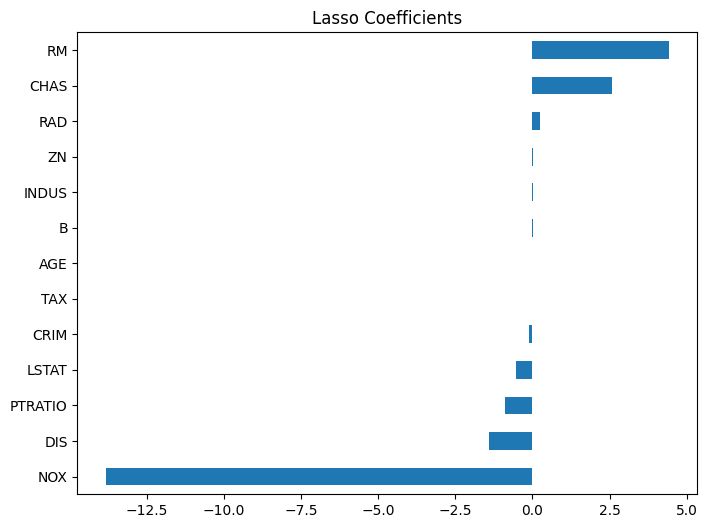

In [4]:
import pickle
import pandas as pd

# 모델 및 feature 이름 불러오기
with open("lasso_model.pkl", "rb") as f:
    lasso = pickle.load(f)

with open("X_train.pkl", "rb") as f:
    X_train = pickle.load(f)

# 계수 확인
coefficients = pd.Series(lasso.coef_, index=X_train.columns)
coefficients.sort_values().plot(kind="barh", figsize=(8,6), title="Lasso Coefficients")
